<a href="https://colab.research.google.com/github/Pratyaksh31/MLM-2/blob/main/Pratyaksh_055031_sl_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Report

## 1. Project Information

**Project Title:** Supervised Learning Project.  
**Student Name(s) & Enrollment Number(s):** Pratyaksh Chauhan, 055031  


---

## 2. Description of Data

### **Data Source**
- **Source:** Provided dataset with 15,000 rows initially, reduced to 5,001 rows.

### **Data Characteristics**
- **Data Type:** Pandas DataFrame.
- **Data Size:** Approximately 5,001 rows and 16 columns in the reduced dataset.
- **Data Dimension:**
  - Rows: 5,001
  - Columns: 16
- **Variable Types:**
  - **Numeric:** Quantity (int64), Value (float64), Weight (float64), Customs_Code (int64), Invoice_Number (int64)
  - **Categorical:** Country, Product, Import_Export, Date, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms
- **About the Dataset:**
  - Transaction-related: Transaction_ID, Country, Product, Import_Export, Quantity, Value, Date, Category, Port, Customs_Code
  - Logistics-related: Weight, Shipping_Method
  - Business Partner-related: Supplier, Customer
  - Invoice and Payment-related: Invoice_Number, Payment_Terms

---

## 3. Project Objectives | Problem Statements

### **Supervised Machine Learning: Classification & Regression**
- Classification of the Shipping Method using various algorithms.
- Identification of significant features impacting the prediction of Shipping Method.

---

## 4. Analysis of Data

### **Data Preprocessing**
- **Reduced Dataset:** From 15,000 rows to 5,001 rows, likely due to specific filtering criteria.
- **Consistency:** Data types remained unchanged post-reduction.
- **Missing Values:** None detected; data appears clean.
- **Encoding:** Categorical variables were encoded into numerical values.
- **Scaling:** Numerical features (Quantity, Value, Weight) were scaled using Min-Max scaling.

### **Descriptive Analysis**
#### **Non-Categorical Data**
- **Key Observations:**
  - Count: 5,001
  - Mean: Close to 0.5 (scaled data)
  - Standard Deviation: Similar across variables
  - Min-Max Range: [0, 1], confirming scaling.
- **Insights:** Positive skewness for Quantity and Weight; platykurtic distribution observed.

#### **Categorical Data**
- **Key Observations:**
  - No missing values; minimum values encoded as 0.
  - Mode provides insight into the most common categories.
- **Insights:** Variables likely encoded using ordinal encoding.

### **Data Visualization**
- **Box Plot:** Symmetrical distributions, no visible outliers.
- **Histogram:** Reinforces low skewness and similar standard deviations.
- **Violin Plot:** Suggests unimodal distributions and consistent spreads across categories.

### **Inferential Statistics**
- **Normality Tests:** Rejected normality for Quantity, Value, and Weight.
- **Correlation Tests:** No significant linear relationships detected among variables.
- **Chi-Square Test:** High p-value (0.6383), indicating no significant association between categorical variables.

### **Train-Test Split**
- Training Set: 70% (3,500 samples)
- Test Set: 30% (1,501 samples)

---

## 5. Observations | Findings

### **Decision Tree Model**
- **Accuracy:** 34.51%
- **Precision/Recall/F1-Score:**
  - Precision and recall values ranged between 0.31 and 0.38.
  - Model struggles to predict Shipping_Method effectively.
- **Confusion Matrix:** Significant misclassification among all classes.
- **Insights:**
  - Limited feature set may hinder performance.
  - Non-linear relationships are not effectively captured.

### **K-Nearest Neighbors (KNN)**
- **Accuracy:** 33.44%
- **Precision/Recall/F1-Score:**
  - Class 2.0 has significantly lower recall (18%).
  - Performance slightly worse than Decision Tree.
- **Insights:** Requires additional features or alternative algorithms.

### **Naive Bayes**
- **Accuracy:** 32.91%
- **Insights:** Similar performance to other models; struggles with limited feature set.

### **Logistic Regression**
- **Accuracy:** 32.84%
- **Confusion Matrix:** Significant misclassification across classes.
- **Insights:** Comparable to Naive Bayes; limited by class imbalance.

### **Support Vector Machine (SVM)**
- **K-Fold Cross Validation:** Mean accuracy: 32.89%, standard deviation: 0.0092.
- **Test Set Accuracy:** 31.78%
- **Insights:** Overly biased towards predicting Class 0.0.

### **Random Forest**
- **Accuracy:** 32.78%
- **Confusion Matrix:** Balanced misclassification across classes.
- **Insights:** Default parameters yield moderate performance.

### **Stochastic Gradient Descent (SGD)**
- **Accuracy:** 35.11% (highest among all models tested).
- **Insights:** Significant bias towards predicting Class 2.0.

---

## 6. Managerial Insights | Recommendations

### **Preprocessing of Data**
- Recommended further feature engineering (e.g., adding product type, shipping distance).
- Address class imbalance using oversampling or weighted loss functions.
- Explore transformations to improve normality.

### **Model Performance**
- Consider ensemble methods or hyperparameter tuning for improved accuracy.
- Add additional relevant features to enhance model predictions.
- Explore alternative algorithms like Gradient Boosting or Neural Networks.

### **Future Considerations**
- Collect more data on potentially impactful features.
- Test additional scaling or transformation methods to optimize data preprocessing.


##**Project Information and Analysis**

In [ ]:
# Import Relevant Python Libraries

from io import StringIO
import requests
import pandas as pd
import statsmodels.formula.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, kstest, anderson, jarque_bera
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, Birch
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer, KNNImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus  # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score,davies_bouldin_score  # For Clustering Model Evaluation
import statsmodels.api as sm
from sklearn import metrics
import scipy.stats as stats
import statsmodels.stats.multicomp as multi
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings('ignore')

In [ ]:
# Replace with your Google Drive file ID.
PC31_file_id = '1xjSAkOyeKlDtCGJyC2qBhVpVWssSM8Cu' # Import Export Full. #https://drive.google.com/file/d/1xjSAkOyeKlDtCGJyC2qBhVpVWssSM8Cu/view?usp=share_link

# PC31_file_id = '1xjSAkOyeKlDtCGJyC2qBhVpVWssSM8Cu' # Import Export with Missing data

# Construct the download PC31_url.
PC31_url = f"https://drive.google.com/uc?id={PC31_file_id}&export=download"

# Download the file content.
PC31_response = requests.get(PC31_url)
PC31_response.raise_for_status()  # Raise an exception for bad PC31_responses (4xx or 5xx)

# Fetch the data using requests
PC31_response = requests.get(PC31_url)
PC31_response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using StringIO
PC31_df = pd.read_csv(StringIO(PC31_response.text))

In [ ]:
# Data Dimensions
print("The dimensions of the data is: ",PC31_df.shape)

The dimensions of the data is:  (15000, 16)


In [ ]:
# Data Variable Type
PC31_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [ ]:
# Bifurcating the Variables into Index, Categorical (Nominal, Ordinal) and Non-Categorical Variables

PC31_index_vars=['Transaction_ID','Invoice_Number']
PC31_nominal_vars=[ 'Country','Product','Import_Export','Category','Port','Shipping_Method','Supplier','Customer','Customs_Code']
PC31_ordinal_vars=['Payment_Terms']

PC31_cat_vars= PC31_nominal_vars + PC31_ordinal_vars
PC31_non_cat_vars=['Quantity','Value','Weight']

## **Taking a Unique Sample of 5001 Records**


In [ ]:
PC31_sample = pd.DataFrame.sample(PC31_df, n=5001, random_state=55031 ,ignore_index=False)
# Displaying the Dimensions of Sample Data.
PC31_sample.shape

(5001, 16)

## **Data Pre-Processing**

In [ ]:
PC31_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 14815 to 6619
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [ ]:
# Check for missing values

PC31_sample.isnull().sum(axis=1)

,0
14815,0
12842,0
1953,0
10867,0
1121,0
...,...
6266,0
9930,0
3812,0
349,0


In [ ]:
# Encoding

PC31_oe = OrdinalEncoder()
PC31_categorical_cols = PC31_sample[PC31_cat_vars]
PC31_oe_fit = PC31_oe.fit_transform(PC31_categorical_cols)
PC31_encoded = pd.DataFrame(PC31_oe_fit, columns=PC31_cat_vars)
PC31_encoded.head()

,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Customs_Code,Payment_Terms
0,25.0,667.0,0.0,0.0,3917.0,2.0,3255.0,4020.0,4553.0,3.0
1,57.0,905.0,0.0,3.0,2224.0,1.0,3483.0,2569.0,3672.0,0.0
2,140.0,296.0,0.0,2.0,2227.0,1.0,3252.0,3902.0,623.0,1.0
3,165.0,841.0,0.0,0.0,1117.0,1.0,763.0,3311.0,3414.0,0.0
4,235.0,722.0,0.0,3.0,2382.0,0.0,2907.0,225.0,1476.0,3.0


In [ ]:
#Scaling

PC31_scaler = MinMaxScaler()
PC31_scaled_data = PC31_scaler.fit_transform(PC31_sample[PC31_non_cat_vars])
PC31_scaled = pd.DataFrame(PC31_scaled_data, columns=PC31_non_cat_vars)
PC31_scaled.head()

,Quantity,Value,Weight
0,0.028314,0.531715,0.026662
1,0.393297,0.959574,0.216503
2,0.492446,0.370866,0.565800
3,0.559880,0.427470,0.183387
4,0.189895,0.215379,0.431582


In [ ]:
# The pre-processed Dataset

PC31_processed = pd.concat([PC31_scaled, PC31_encoded], axis=1)
PC31_processed.head()

PC31_sample = PC31_processed
PC31_sample.head()

,Quantity,Value,Weight,Country,Product,Import_Export,Category,Port,Shipping_Method,Supplier,Customer,Customs_Code,Payment_Terms
0,0.028314,0.531715,0.026662,25.0,667.0,0.0,0.0,3917.0,2.0,3255.0,4020.0,4553.0,3.0
1,0.393297,0.959574,0.216503,57.0,905.0,0.0,3.0,2224.0,1.0,3483.0,2569.0,3672.0,0.0
2,0.492446,0.370866,0.565800,140.0,296.0,0.0,2.0,2227.0,1.0,3252.0,3902.0,623.0,1.0
3,0.559880,0.427470,0.183387,165.0,841.0,0.0,0.0,1117.0,1.0,763.0,3311.0,3414.0,0.0
4,0.189895,0.215379,0.431582,235.0,722.0,0.0,3.0,2382.0,0.0,2907.0,225.0,1476.0,3.0


## **Descriptive Statistics**

### **1) Non-Categorical Variables**

In [ ]:
PC31_sample[PC31_non_cat_vars].describe()

,Quantity,Value,Weight
count,5001.000000,5001.000000,5001.000000
mean,0.497846,0.501792,0.494625
std,0.287951,0.288510,0.290847
min,0.000000,0.000000,0.000000
25%,0.251726,0.249804,0.245702
50%,0.493847,0.504107,0.487180
75%,0.747074,0.754184,0.751614
max,1.000000,1.000000,1.000000


In [ ]:
def summarize_numerical(my_sample, variables):
    summary = {}

    for col in variables:
        if col in PC31_sample[PC31_non_cat_vars]:  # Check if the column exists in the DataFrame
            summary[col] = {
                'Mode': my_sample[col].mode()[0],
                'Range': my_sample[col].max() - my_sample[col].min(),
                'Skewness': my_sample[col].skew() ,
                'Kurtosis': my_sample[col].kurtosis()
            }
    return summary

In [ ]:
PC31_summary_stats = summarize_numerical(PC31_sample,PC31_non_cat_vars)
PC31_summary_df = pd.DataFrame.from_dict(PC31_summary_stats, orient='index')
PC31_summary_df

,Mode,Range,Skewness,Kurtosis
Quantity,0.027914,1.0,0.027235,-1.182852
Value,0.023963,1.0,0.000820,-1.201527
Weight,0.014067,1.0,0.037879,-1.227050


In [ ]:
# Coefficient of Variation
def coefficient_of_variation(data):
    mean = data.mean()
    std = data.std()
    cv = (std / mean) * 100
    return cv

cv_results = {}

for col in PC31_non_cat_vars:
    cv_results[col] = coefficient_of_variation(PC31_sample[col])

# Display the results
print("Coefficient of Variation (%):")
for col, cv in cv_results.items():
    print(f"{col}: {cv:.2f}%")

Coefficient of Variation (%):
Quantity: 57.84%
Value: 57.50%
Weight: 58.80%


In [ ]:
correlation_data = PC31_sample[PC31_non_cat_vars]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Quantity,Value,Weight
Quantity,1.000000,-0.011238,0.014324
Value,-0.011238,1.000000,0.019582
Weight,0.014324,0.019582,1.000000


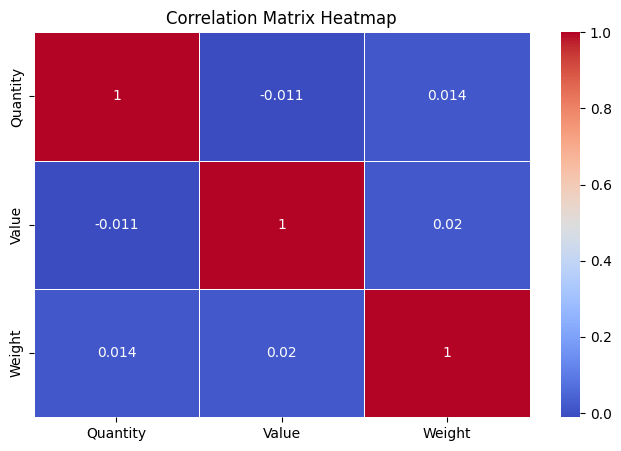

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Confidence Interval for the Mean
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std = data.std()
    n = len(data)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)  # z-score for 95% CI
    margin_of_error = z * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return (lower_bound, upper_bound)

ci_results = {}
for col in PC31_non_cat_vars:
    ci_results[col] = confidence_interval(PC31_sample[col])


print("\nConfidence Intervals (95%):")
for col, ci in ci_results.items():
    print(f"{col}: {ci[0]:.2f} to {ci[1]:.2f}")


Confidence Intervals (95%):
Quantity: 0.49 to 0.51
Value: 0.49 to 0.51
Weight: 0.49 to 0.50


### **2) Categorical Variables**

In [ ]:
# Categorical Data

def PC31_categorical_summary(df, cat_cols):
    summary = {}
    for col in cat_cols:
        if col in df.columns:
            summary[col] = {
                'Count': df[col].count(),
                'Minimum': df[col].min(),
                'Maximum': df[col].max(),
                'Mode': df[col].mode().iloc[0],
            }
    return summary

PC31_categorical_summaries = PC31_categorical_summary(PC31_sample, PC31_cat_vars)

for col, stats in PC31_categorical_summaries.items():
    print(f"Summary for {col}:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name}: {stat_value}")
    print("-" * 20)  # separator

Summary for Country:
  Count: 5001
  Minimum: 0.0
  Maximum: 242.0
  Mode: 49.0
--------------------
Summary for Product:
  Count: 5001
  Minimum: 0.0
  Maximum: 964.0
  Mode: 911.0
--------------------
Summary for Import_Export:
  Count: 5001
  Minimum: 0.0
  Maximum: 1.0
  Mode: 1.0
--------------------
Summary for Category:
  Count: 5001
  Minimum: 0.0
  Maximum: 4.0
  Mode: 3.0
--------------------
Summary for Port:
  Count: 5001
  Minimum: 0.0
  Maximum: 4305.0
  Mode: 1711.0
--------------------
Summary for Shipping_Method:
  Count: 5001
  Minimum: 0.0
  Maximum: 2.0
  Mode: 0.0
--------------------
Summary for Supplier:
  Count: 5001
  Minimum: 0.0
  Maximum: 4553.0
  Mode: 3795.0
--------------------
Summary for Customer:
  Count: 5001
  Minimum: 0.0
  Maximum: 4836.0
  Mode: 1564.0
--------------------
Summary for Customs_Code:
  Count: 5001
  Minimum: 0.0
  Maximum: 4988.0
  Mode: 1143.0
--------------------
Summary for Payment_Terms:
  Count: 5001
  Minimum: 0.0
  Maximum: 3

## **Data Visualization**

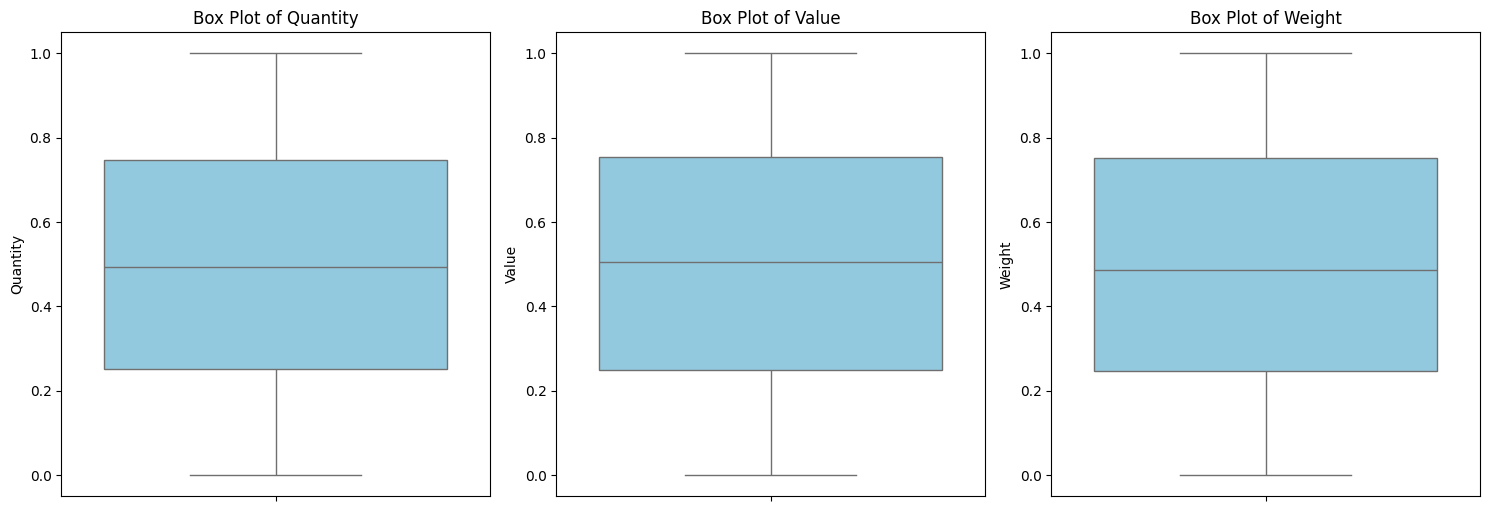

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(PC31_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=PC31_sample[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


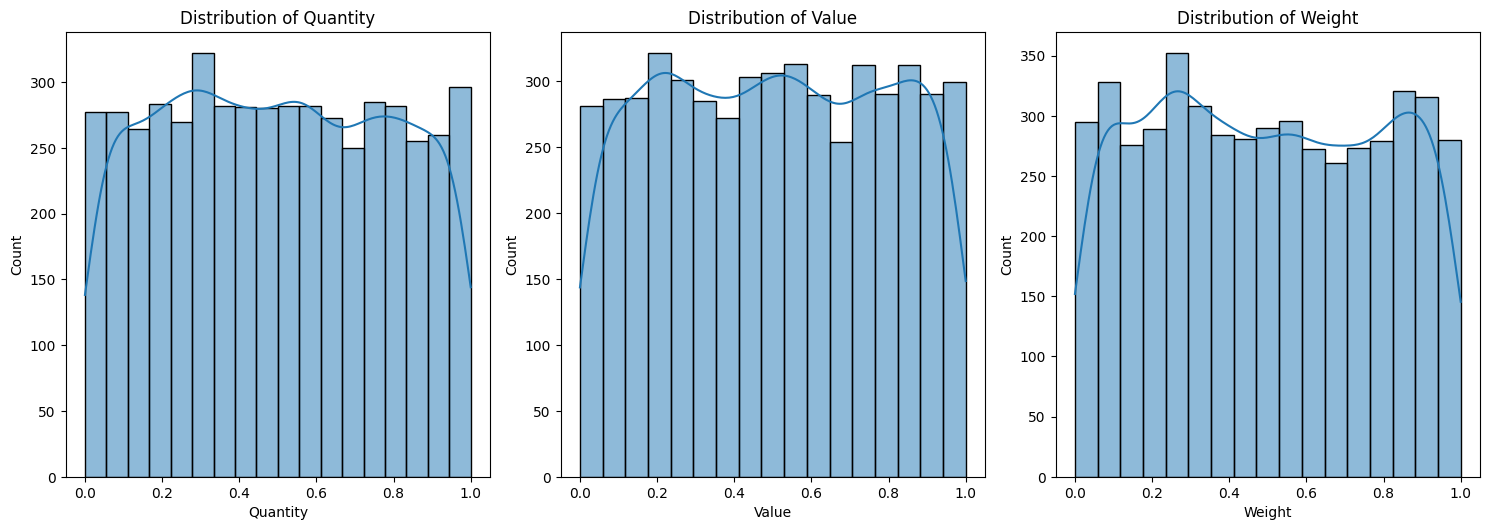

In [ ]:
# Histograms with KDE for distribution visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(PC31_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(PC31_sample[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

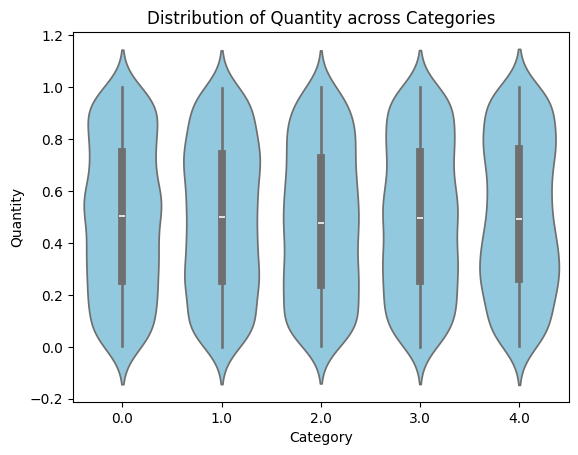

In [ ]:
sns.violinplot(x='Category', y='Quantity', data=PC31_sample, color='skyblue')
plt.title('Distribution of Quantity across Categories')
plt.show()


## **Inferential Statistics**

In [ ]:
from termcolor import colored

PC31_contingency_table = pd.crosstab(PC31_sample['Import_Export'], PC31_sample['Category'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(PC31_contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the results
PC31_alpha = 0.05  # Significance level

if p < PC31_alpha:
    result = "Reject the null hypothesis: There is a significant association between the two categorical variables."
    print(colored(result, "green"))
else:
    result = "There is no significant association between the two categorical variables."
    print(colored(result, "red"))


Chi-square statistic: 2.54
P-value: 0.6383
Degrees of freedom: 4
Expected frequencies:
[[493.53269346 496.47330534 497.94361128 499.9040192  463.14637073]
 [513.46730654 516.52669466 518.05638872 520.0959808  481.85362927]]
There is no significant association between the two categorical variables.


In [ ]:
# Test of Normality {Shapiro-Wilk | Kolmogorov-Smirnov | Anderson-Darling | Jarque-Bera

def normality_tests(data):

    PC31_results = {}

    # Shapiro-Wilk test
    shapiro_statistic, shapiro_pvalue = shapiro(data)
    PC31_results["Shapiro-Wilk"] = {"statistic": shapiro_statistic, "p-value": shapiro_pvalue}

    # Kolmogorov-Smirnov test (against a normal distribution)
    ks_statistic, ks_pvalue = kstest(data, 'norm')
    PC31_results["Kolmogorov-Smirnov"] = {"statistic": ks_statistic, "p-value": ks_pvalue}

    # Anderson-Darling test
    anderson_result = anderson(data)
    PC31_results["Anderson-Darling"] = {
        "statistic": anderson_result.statistic,
        "critical_values": anderson_result.critical_values,
        "significance_level": anderson_result.significance_level
    }

    # Jarque-Bera test
    jb_statistic, jb_pvalue = jarque_bera(data)
    PC31_results["Jarque-Bera"] = {"statistic": jb_statistic, "p-value": jb_pvalue}

    return PC31_results

In [ ]:
from scipy import stats

# Test of Correlation (T-test)
def t_test_correlation(data1, data2):
    t_statistic, p_value = stats.ttest_ind(data1, data2)
    return {"t-statistic": t_statistic, "p-value": p_value}

for col in PC31_non_cat_vars:
    print(f"Normality tests for {col}:")
    normality_test_results = normality_tests(PC31_sample[col])
    for test_name, result in normality_test_results.items():
        print(f"  {test_name}: {result}")

    # Example of T-test
    if len(PC31_non_cat_vars) > 1:
        for i in range(len(PC31_non_cat_vars)):
            for j in range(i+1, len(PC31_non_cat_vars)):
                col1, col2 = PC31_non_cat_vars[i], PC31_non_cat_vars[j]
                t_test_result = t_test_correlation(PC31_sample[col1], PC31_sample[col2])
                print(f"T-test Correlation between {col1} and {col2}: {t_test_result}")
    print()
    print('*'*20)
    print()

Normality tests for Quantity:
  Shapiro-Wilk: {'statistic': 0.9563470991051519, 'p-value': 2.746207551408695e-36}
  Kolmogorov-Smirnov: {'statistic': 0.5, 'p-value': 0.0}
  Anderson-Darling: {'statistic': 52.83563122494252, 'critical_values': array([0.576, 0.655, 0.786, 0.917, 1.091]), 'significance_level': array([15. , 10. ,  5. ,  2.5,  1. ])}
  Jarque-Bera: {'statistic': 292.1717595871384, 'p-value': 3.595079690804998e-64}
T-test Correlation between Quantity and Value: {'t-statistic': -0.6844902867693035, 'p-value': 0.4936814836934338}
T-test Correlation between Quantity and Weight: {'t-statistic': 0.5564801295188053, 'p-value': 0.5778951265524799}
T-test Correlation between Value and Weight: {'t-statistic': 1.2370084604269795, 'p-value': 0.21611298979592103}

********************

Normality tests for Value:
  Shapiro-Wilk: {'statistic': 0.9548147735033155, 'p-value': 8.739252690133146e-37}
  Kolmogorov-Smirnov: {'statistic': 0.5, 'p-value': 0.0}
  Anderson-Darling: {'statistic': 56

#**Supervised Learning**

### **Split into test and train dataset**

In [ ]:
PC31_X = PC31_processed[['Quantity','Weight']]  # Features (excluding 'Cluster')
PC31_y = PC31_processed[['Shipping_Method']]  # Target variable

PC31_X_train, PC31_X_test, PC31_y_train, PC31_y_test = train_test_split(PC31_X, PC31_y, test_size=0.3, random_state=55031)

# Print the shapes of the resulting datasets
print("X_train shape:", PC31_X_train.shape)
print("X_test shape:", PC31_X_test.shape)
print("y_train shape:", PC31_y_train.shape)
print("y_test shape:", PC31_y_test.shape)

X_train shape: (3500, 2)
X_test shape: (1501, 2)
y_train shape: (3500, 1)
y_test shape: (1501, 1)


###**Classification**

###**Decision Tree**

In [ ]:
# Initialize the Decision Tree Classifier
PC31_dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=55031)

# Train the model
PC31_dt_classifier.fit(PC31_X_train, PC31_y_train)

# Make predictions on the test set
PC31_y_pred_dt = PC31_dt_classifier.predict(PC31_X_test)

In [ ]:
# Evaluate the model
PC31_accuracy_dt = accuracy_score(PC31_y_test, PC31_y_pred_dt)
print(f"Decision Tree Accuracy: {PC31_accuracy_dt}")
print(classification_report(PC31_y_test, PC31_y_pred_dt))

Decision Tree Accuracy: 0.3451032644903398
              precision    recall  f1-score   support

         0.0       0.33      0.38      0.36       477
         1.0       0.36      0.35      0.35       497
         2.0       0.35      0.31      0.33       527

    accuracy                           0.35      1501
   macro avg       0.35      0.35      0.34      1501
weighted avg       0.35      0.35      0.34      1501



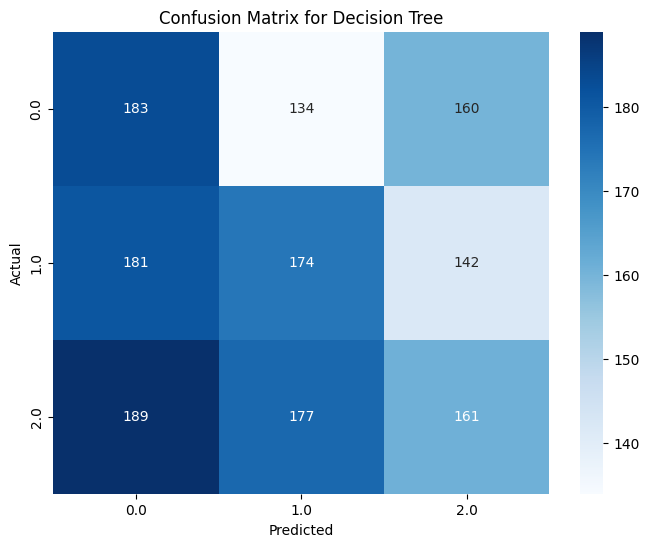

In [ ]:
# Confusion matrix

PC31_cm = confusion_matrix(PC31_y_test, PC31_y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(PC31_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=PC31_dt_classifier.classes_, yticklabels=PC31_dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

###**K Nearest Neighbours**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# 2. Create and train the KNN classifier
PC31_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
PC31_knn.fit(PC31_X_train, PC31_y_train)

# 3. Make predictions on the test set
PC31_y_pred = PC31_knn.predict(PC31_X_test)

# 4. Evaluate the model
PC31_accuracy_knn = accuracy_score(PC31_y_test, PC31_y_pred)
print(f"Accuracy: {PC31_accuracy_knn}")
print(classification_report(PC31_y_test, PC31_y_pred))

Accuracy: 0.3344437041972019
              precision    recall  f1-score   support

         0.0       0.33      0.52      0.41       477
         1.0       0.35      0.32      0.34       497
         2.0       0.32      0.18      0.23       527

    accuracy                           0.33      1501
   macro avg       0.33      0.34      0.32      1501
weighted avg       0.33      0.33      0.32      1501



### **Naive Bayes (NB)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Or MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# 2. Create and train the Naive Bayes classifier
PC31_nb = GaussianNB()  # Choose the appropriate NB type (GaussianNB, MultinomialNB, BernoulliNB)
PC31_nb.fit(PC31_X_train, PC31_y_train)

# 3. Make predictions on the test set
PC31_y_pred = PC31_nb.predict(PC31_X_test)

# 4. Evaluate the model
PC31_accuracy_nb = accuracy_score(PC31_y_test, PC31_y_pred)
print(f"Accuracy: {PC31_accuracy_nb}")
print(classification_report(PC31_y_test, PC31_y_pred))

Accuracy: 0.3291139240506329
              precision    recall  f1-score   support

         0.0       0.30      0.50      0.38       477
         1.0       0.33      0.18      0.23       497
         2.0       0.38      0.31      0.34       527

    accuracy                           0.33      1501
   macro avg       0.34      0.33      0.32      1501
weighted avg       0.34      0.33      0.32      1501



##**Logistic Regression**

In [ ]:
# Initialize the Logistic Regression model
PC31_logreg_classifier = LogisticRegression(random_state=55031)

# Train the model
PC31_logreg_classifier.fit(PC31_X_train, PC31_y_train)

# Make predictions on the test set
PC31_y_pred_logreg = PC31_logreg_classifier.predict(PC31_X_test)

# Evaluate the model
PC31_accuracy_logreg = accuracy_score(PC31_y_test, PC31_y_pred_logreg)
print(f"Logistic Regression Accuracy: {PC31_accuracy_logreg}")
print(classification_report(PC31_y_test, PC31_y_pred_logreg))

Logistic Regression Accuracy: 0.3284477015323118
              precision    recall  f1-score   support

         0.0       0.30      0.48      0.37       477
         1.0       0.34      0.22      0.27       497
         2.0       0.37      0.30      0.33       527

    accuracy                           0.33      1501
   macro avg       0.34      0.33      0.32      1501
weighted avg       0.34      0.33      0.32      1501



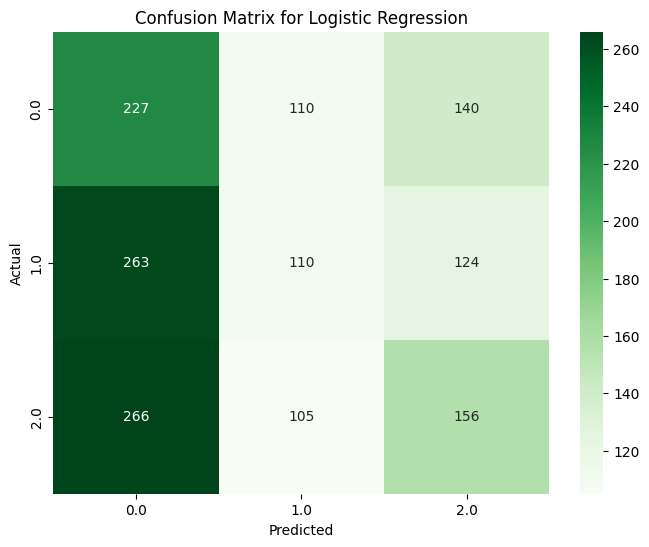

In [ ]:
# Confusion Matrix for Logistic Regression
PC31_cm_logreg = confusion_matrix(PC31_y_test, PC31_y_pred_logreg)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(PC31_cm_logreg, annot=True, fmt='d', cmap='Greens',  # Different colormap
            xticklabels=PC31_logreg_classifier.classes_, yticklabels=PC31_logreg_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

###**K-Fold Cross Validation for Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
PC31_svm_classifier = SVC(kernel='linear', random_state=55031)

# Set up K-Fold Cross-Validation
PC31_kfold = KFold(n_splits=5, shuffle=True, random_state=55031)

# Perform Cross-Validation
PC31_cv_accuracy = cross_val_score(PC31_svm_classifier, PC31_X_train, PC31_y_train, cv=PC31_kfold, scoring='accuracy')

# Output Cross-Validation results
print("K-Fold Cross-Validation Accuracy Scores: ", PC31_cv_accuracy)
print("Mean Accuracy: ", PC31_cv_accuracy.mean())
print("Standard Deviation of Accuracy: ", PC31_cv_accuracy.std())

# Train the model on the entire training set (if needed for later use)
PC31_svm_classifier.fit(PC31_X_train, PC31_y_train)

# Evaluate the model on the test set
PC31_y_pred_svm = PC31_svm_classifier.predict(PC31_X_test)
PC31_accuracy_svm = accuracy_score(PC31_y_test, PC31_y_pred_svm)
print(f"SVM Test Set Accuracy: {PC31_accuracy_svm}")
print(classification_report(PC31_y_test, PC31_y_pred_svm))

K-Fold Cross-Validation Accuracy Scores:  [0.33142857 0.33       0.33857143 0.33285714 0.31142857]
Mean Accuracy:  0.32885714285714285
Standard Deviation of Accuracy:  0.009187391537607724
SVM Test Set Accuracy: 0.31778814123917387
              precision    recall  f1-score   support

         0.0       0.32      1.00      0.48       477
         1.0       0.00      0.00      0.00       497
         2.0       0.00      0.00      0.00       527

    accuracy                           0.32      1501
   macro avg       0.11      0.33      0.16      1501
weighted avg       0.10      0.32      0.15      1501



###**K-Fold Cross Validation for Logistic Regression**

In [ ]:
# Initialize the Logistic Regression model
PC31_logreg_classifier = LogisticRegression(random_state=55031)

# Set up K-Fold Cross-Validation
PC31_kfold = KFold(n_splits=5, shuffle=True, random_state=55031)

# Perform Cross-Validation
PC31_cv_accuracy = cross_val_score(PC31_logreg_classifier, PC31_X_train, PC31_y_train, cv=PC31_kfold, scoring='accuracy')

# Output Cross-Validation results
print("K-Fold Cross-Validation Accuracy Scores: ", PC31_cv_accuracy)
print("Mean Accuracy: ", PC31_cv_accuracy.mean())
print("Standard Deviation of Accuracy: ", PC31_cv_accuracy.std())

# Train the model on the entire training set (if needed for later use)
PC31_logreg_classifier.fit(PC31_X_train, PC31_y_train)

# Evaluate the model on the test set
PC31_y_pred_logreg = PC31_logreg_classifier.predict(PC31_X_test)
PC31_accuracy_logreg = accuracy_score(PC31_y_test, PC31_y_pred_logreg)
print(f"Logistic Regression Test Set Accuracy: {PC31_accuracy_logreg}")
print(classification_report(PC31_y_test, PC31_y_pred_logreg))

K-Fold Cross-Validation Accuracy Scores:  [0.32285714 0.31       0.35428571 0.33714286 0.32571429]
Mean Accuracy:  0.32999999999999996
Standard Deviation of Accuracy:  0.014901034069034617
Logistic Regression Test Set Accuracy: 0.3284477015323118
              precision    recall  f1-score   support

         0.0       0.30      0.48      0.37       477
         1.0       0.34      0.22      0.27       497
         2.0       0.37      0.30      0.33       527

    accuracy                           0.33      1501
   macro avg       0.34      0.33      0.32      1501
weighted avg       0.34      0.33      0.32      1501



###**K-Fold Cross Validation for Stochastic Gradient Descent (SGD)**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

# 1. Initialize the SGD Classifier
PC31_sgd_classifier = SGDClassifier(loss='log_loss', random_state=55031, max_iter=1000, tol=1e-3)
# Changed 'log' to 'log_loss' for logistic regression

# 2. Set up K-Fold Cross-Validation
PC31_kfold = KFold(n_splits=5, shuffle=True, random_state=55031)

# 3. Perform Cross-Validation
PC31_cv_accuracy = cross_val_score(PC31_sgd_classifier, PC31_X_train, PC31_y_train, cv=PC31_kfold, scoring='accuracy')

# 4. Output Cross-Validation Results
print("K-Fold Cross-Validation Accuracy Scores: ", PC31_cv_accuracy)
print("Mean Accuracy: ", PC31_cv_accuracy.mean())
print("Standard Deviation of Accuracy: ", PC31_cv_accuracy.std())

# 5. Train the SGD Classifier on the entire training set
PC31_sgd_classifier.fit(PC31_X_train, PC31_y_train)

# 6. Make predictions on the test set
PC31_y_pred_sgd = PC31_sgd_classifier.predict(PC31_X_test)

# 7. Evaluate the Model
PC31_accuracy_sgd = accuracy_score(PC31_y_test, PC31_y_pred_sgd)
print(f"SGD Test Set Accuracy: {PC31_accuracy_sgd}")
print(classification_report(PC31_y_test, PC31_y_pred_sgd))

K-Fold Cross-Validation Accuracy Scores:  [0.33       0.33142857 0.31285714 0.36285714 0.30142857]
Mean Accuracy:  0.32771428571428574
Standard Deviation of Accuracy:  0.020812084401684937
SGD Test Set Accuracy: 0.3510992671552298
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       477
         1.0       0.00      0.00      0.00       497
         2.0       0.35      1.00      0.52       527

    accuracy                           0.35      1501
   macro avg       0.12      0.33      0.17      1501
weighted avg       0.12      0.35      0.18      1501



###**Comparison of LR vs SGD**

In [ ]:
print(f"Logistic Regression Accuracy: {PC31_accuracy_logreg}")
print(f"SGD Accuracy: {PC31_accuracy_sgd}")

if PC31_accuracy_logreg > PC31_accuracy_sgd:
    print("Logistic Regression model performs better.")
elif PC31_accuracy_sgd > PC31_accuracy_logreg:
    print("Stochastic Gradient Descent model performs better.")
else:
    print("Both models perform equally.")

Logistic Regression Accuracy: 0.3284477015323118
SGD Accuracy: 0.3510992671552298
Stochastic Gradient Descent model performs better.


###**Comparison of LR vs SVM**

In [ ]:
print(f"Logistic Regression Accuracy: {PC31_accuracy_logreg}")
print(f"SVM Accuracy: {PC31_accuracy_svm}")

if PC31_accuracy_logreg > PC31_accuracy_svm:
    print("Logistic Regression model performs better.")
elif PC31_accuracy_svm > PC31_accuracy_logreg:
    print("Support Vector Machine model performs better.")
else:
    print("Both models perform equally.")

Logistic Regression Accuracy: 0.3284477015323118
SVM Accuracy: 0.31778814123917387
Logistic Regression model performs better.


###**Comparison of DT vs KNN**

In [ ]:
print(f"Decision Tree Accuracy: {PC31_accuracy_dt}")
print(f"KNN Accuracy: {PC31_accuracy_knn}")

if PC31_accuracy_dt > PC31_accuracy_knn:
    print("Decision Tree model performs better.")
elif PC31_accuracy_knn > PC31_accuracy_dt:
    print("K Nearest Neighbour model performs better.")
else:
    print("Both models perform equally.")

Decision Tree Accuracy: 0.3451032644903398
KNN Accuracy: 0.3344437041972019
Decision Tree model performs better.


###**Comparison of DT vs NB**

In [ ]:
print(f"Decision Tree Accuracy: {PC31_accuracy_dt}")
print(f"Naive Bayes Accuracy: {PC31_accuracy_nb}")

if PC31_accuracy_dt > PC31_accuracy_nb:
    print("Decision Tree model performs better.")
elif PC31_accuracy_nb > PC31_accuracy_dt:
    print("Naive Bayes model performs better.")
else:
    print("Both models perform equally.")

Decision Tree Accuracy: 0.3451032644903398
Naive Bayes Accuracy: 0.3291139240506329
Decision Tree model performs better.


###**Comparison of LR vs DT**

In [ ]:
print(f"Logistic Regression Accuracy: {PC31_accuracy_logreg}")
print(f"Decision Tree Accuracy: {PC31_accuracy_dt}")

if PC31_accuracy_logreg > PC31_accuracy_dt:
    print("Logistic Regression model performs better.")
elif PC31_accuracy_dt > PC31_accuracy_logreg:
    print("Decision Tree model performs better.")
else:
    print("Both models perform equally.")

Logistic Regression Accuracy: 0.3284477015323118
Decision Tree Accuracy: 0.3451032644903398
Decision Tree model performs better.


##**Random Forest**

In [ ]:
# Initialize the Random Forest Classifier
PC31_rf_classifier = RandomForestClassifier(random_state=55031)

# Train the model
PC31_rf_classifier.fit(PC31_X_train, PC31_y_train)

# Make predictions on the test set
PC31_y_pred_rf = PC31_rf_classifier.predict(PC31_X_test)

# Evaluate the model
PC31_accuracy_rf = accuracy_score(PC31_y_test, PC31_y_pred_rf)
print(f"Random Forest Accuracy: {PC31_accuracy_rf}")
print(classification_report(PC31_y_test, PC31_y_pred_rf))

Random Forest Accuracy: 0.3277814790139907
              precision    recall  f1-score   support

         0.0       0.33      0.38      0.35       477
         1.0       0.32      0.33      0.33       497
         2.0       0.33      0.28      0.31       527

    accuracy                           0.33      1501
   macro avg       0.33      0.33      0.33      1501
weighted avg       0.33      0.33      0.33      1501



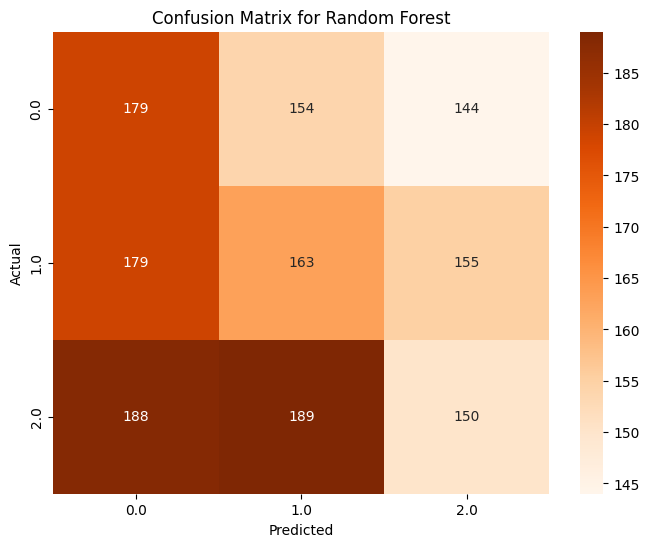

In [ ]:
# Confusion Matrix for Random Forest
PC31_cm_rf = confusion_matrix(PC31_y_test, PC31_y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(PC31_cm_rf, annot=True, fmt='d', cmap='Oranges',  # Different colormap
            xticklabels=PC31_rf_classifier.classes_, yticklabels=PC31_rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

###**Extreme Gradient Boosting**

In [ ]:
PC31_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=55031).fit(PC31_X_train, PC31_y_train)
print("The mean accuracy on the given test data and labels from Extreme Gradient Boosting is",PC31_clf.score(PC31_X_test, PC31_y_test))

The mean accuracy on the given test data and labels from Extreme Gradient Boosting is 0.32445036642238506


**Observation:**

The mean accuracy of 0.3244 (rounded to four decimal places) suggests that the XGBoost model, on average, correctly classifies approximately 32.44% of the instances in the given test data. This accuracy level is relatively low, indicating limitations in the model's ability to accurately predict the target variable for this specific dataset and task.

###**Comparison of RF vs DT**

In [ ]:
#Compare Random Forest and Decision Tree

print(f"\nDecision Tree Accuracy: {PC31_accuracy_dt}")
print(f"Random Forest Accuracy: {PC31_accuracy_rf}")

if PC31_accuracy_rf > PC31_accuracy_dt:
    print("Random Forest performs better than Decision Tree.")
elif PC31_accuracy_dt > PC31_accuracy_rf:
    print("Decision Tree performs better than Random Forest.")
else:
    print("Both models perform equally.")


Decision Tree Accuracy: 0.3451032644903398
Random Forest Accuracy: 0.3277814790139907
Decision Tree performs better than Random Forest.
